<font color="#de3023"><h1><b>REMINDER MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

# Part 1: Introduction
*by Trenton Chang*



In this series of notebooks, we'll be exploring the intersections of ethics and AI. We'll be using the COMPAS dataset, a dataset of arrest records with demographic, prior conviction, and other information. 

We'll assume basic familiarity with Python, basic machine learning concepts, as well as (very) basic knowledge of Pandas (a useful DataFrame processing/data analysis tool). As you go through this notebook, please feel free to add cells for your exploration; however, do keep all the original cells.

This notebook will cover these general topics:

1. Building a competitive model on the COMPAS dataset. 
2. Analyzing bias and fairness on the COMPAS dataset.
3. Exploring and justifying fair models on the COMPAS dataset; discussing fairness in machine learning beyond COMPAS.

## Learning Goals

* Review basic mathematical concepts relevant to training a machine learning model.
* Review how model iteration works in machine learning.
* Explore and develop a machine learning model.

## Background: What is COMPAS?

COMPAS, which stands for Correctional Offender Management Profiling for Alternative Sanctions, is an algorithmic risk-assesment tool that attempts to predict whether a defendant is likely to reoffend (recidivate). This tool is specifically intended to be used in the pre-trial detention phase, in which bail determinations are made. Ideally, based on particular characteristics about a defendant, the model would predict whether or not someone is likely to commit another crime if released. This software has been used in many U.S. jurisdictions, including New York, Wisconsin, California, and Broward County, FL.

Racial tensions and specificaly anti-Blackness has existed in the U.S. for centuries. In the modern day, racial bias in the U.S. criminal justice system is a particularly difficult sociological problem. The idea was that a machine learning model would be able to be "less biased" than a human judge, and therefore provide better outcomes for all people. However, the adoption of COMPAS has not been without controversy, and has been challenged on legal and ethical grounds perhaps most prominently in the Wisconsin State Supreme Court case *Loomis v. Wisconsin (2012)*.

As instructors, we understand that given current events, this is an extremely sensitive topic. The topics in this notebook unfortunately continue to be salient today, and are precisely the conditions of injustice that directly result in datasets like COMPAS. We all come from different backgrounds, so please be respectful of your peers and consider the impact your words have on our classroom community. For those of you who would like to learn more about racial bias in the U.S. and the current state of affairs, I found [this Atlantic article](https://www.theatlantic.com/ideas/archive/2020/06/american-nightmare/612457/) to be an excellent read. Do note that it covers some difficult topics that may be difficult to process or read for some individuals. We ask you again to be mindful and respectful. Please do not hesitate to reach out to the teaching team if you would like any support.

Our dataset is specifically from the Broward County, FL public records, which ProPublica was able to obtain and make public through a Freedom of Information Act (FOIA) request. Let's take a look at the data.

## Setup

In [ ]:
import pandas as pd
import numpy as np

## Data Exploration

Let's get started with some EDA (exploratory data analysis). Run the below cell to download the dataset.

In [ ]:
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Projects%20-%20AI%20and%20Ethics%20-%20Criminal%20Justice/compas-scores-two-years.csv'

--2021-11-07 20:37:47--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Projects%20-%20AI%20and%20Ethics%20-%20Criminal%20Justice/compas-scores-two-years.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546487 (2.4M) [text/csv]
Saving to: ‘compas-scores-two-years.csv’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.03s   

2021-11-07 20:37:47 (85.5 MB/s) - ‘compas-scores-two-years.csv’ saved [2546487/2546487]



To make sure the download was successful, you should be able to see a file along the lines of `compas-scores-two-years.csv` in the File Explorer (folder-symbol on the left sidebar of the Colab interface).

Let's load the data and see what it looks like!

In [ ]:
data = pd.read_csv("compas-scores-two-years.csv", header=0)
data.head(n=20)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,6,0,0,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,14002304CF10A,2014-02-18,NaN,1.0,F,Possession Burglary Tools,1,14004485CF10A,(F2),0.0,2014-03-31,Poss of Firearm by Convic Felo,2014-03-31,2014-04-18,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,6,Medium,2014-02-19,Risk of Violence,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
7,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,0,4,0,0,3,-1.0,2013-08-29 08:55:23,2013-08-30 08:42:13,13012216CF10A,NaN,2013-08-29,1.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-08-30,Risk of Violence,3,Low,2013-08-30,2014-05-22,2014-06-03,3,0,265,0,0
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,0,1,0,0,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,14004524MM10A,2014-03-15,NaN,1.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-03-16,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
9,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less

Let's find out what fields there are:

In [ ]:
data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

Let's filter out columns that aren't relevant/redundant to our analysis (e.g. name, case number, date of arrest), and make the column names more intuitive.

Column descriptions:

* `sex`: Male or female.
* `age`: Age.
* `age_category`: Age group; i.e. under 25, 25 to 45, or over 45.
* `race`: Categorical variable; takes on values `African-American`,  `Caucasian`, `Asian`, `Native American`, `Hispanic`, and `Other`.
* `juvenile_felony_count`: Number of times defendant has previously been convicted of a juvenile felony.
* `juvenile_misdemeanor_count`: Number of times defendant has previously been convicted of a juvenile misdemeanor.
* `juvenile_other_count`: Number of times defendant has been convicted of another juvenile charge.
* `prior_convictions`: Number of prior convictions for a defendant.
* `current_charge`: Felony, misdemeanor, or other (`F`, `M`, or `O`).
* `charge_description`: The charge for which they were arrested, and took a risk assessment.
* `recidivated_last_two_years`: Recidivated within two years of completing the assessment. This variable is the focus of our task, and what we'll be predicting.

In [ ]:
df = data.drop(labels=['id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'days_b_screening_arrest', 
                         'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
                         'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 
                         'r_jail_in', 'r_jail_out', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'decile_score.1',
                         'violent_recid', 'vr_charge_desc', 'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 
                         'v_screening_date', 'event', 'type_of_assessment', 'v_type_of_assessment', 'screening_date',
                         'score_text', 'v_score_text', 'v_decile_score', 'decile_score', 'is_recid', 'is_violent_recid'], axis=1)
df.columns = ['sex', 'age', 'age_category', 'race', 'juvenile_felony_count', 'juvenile_misdemeanor_count', 'juvenile_other_count', 
              'prior_convictions', 'current_charge', 'charge_description', 'recidivated_last_two_years']
df.head()

,sex,age,age_category,race,juvenile_felony_count,juvenile_misdemeanor_count,juvenile_other_count,prior_convictions,current_charge,charge_description,recidivated_last_two_years
0,Male,69,Greater than 45,Other,0,0,0,0,F,Aggravated Assault w/Firearm,0
1,Male,34,25 - 45,African-American,0,0,0,0,F,Felony Battery w/Prior Convict,1
2,Male,24,Less than 25,African-American,0,0,1,4,F,Possession of Cocaine,1
3,Male,23,Less than 25,African-American,0,1,0,1,F,Possession of Cannabis,0
4,Male,43,25 - 45,Other,0,0,0,2,F,arrest case no charge,0


Finally, let's run `df.info()` to see some key information about our dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sex                         7214 non-null   object
 1   age                         7214 non-null   int64 
 2   age_category                7214 non-null   object
 3   race                        7214 non-null   object
 4   juvenile_felony_count       7214 non-null   int64 
 5   juvenile_misdemeanor_count  7214 non-null   int64 
 6   juvenile_other_count        7214 non-null   int64 
 7   prior_convictions           7214 non-null   int64 
 8   current_charge              7214 non-null   object
 9   charge_description          7185 non-null   object
 10  recidivated_last_two_years  7214 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 620.1+ KB


Excellent! Here are some preliminary questions to check your understanding of the data, and get familiar with basic operations in Pandas:

## Question 1: Exploratory Data Analysis

1.1. How many data points are in the dataset? 

1.2. Name the three most common charge descriptions in the dataset.

1.3. How many defendants are younger than 25 and have at least two prior convictions?

1.4. Free response time! What are your general observations about the data? How might certain features be useful here? Are certain groups more represented than others (e.g. with respect to gender, age, race)?

In [ ]:
# Please enter your answers to the above questions in the space specified.
# QUESTION 1 (an integer)
print(df.shape[0])
# QUESTION 2 (a list of strings)
print(pd.value_counts(df["charge_description"])[0:3])
# QUESTION 3 (an integer)
under_25 =df[df["age_category"]=="Less than 25"]
print(under_25[under_25["prior_convictions"]>1])
# QUESTION 4 (2-3 sentences)


7214
Battery                  1156
arrest case no charge    1137
Possession of Cocaine     474
Name: charge_description, dtype: int64
         sex  age  ...              charge_description recidivated_last_two_years
2       Male   24  ...           Possession of Cocaine                          1
11      Male   23  ...                         Battery                          1
40    Female   21  ...           arrest case no charge                          0
55      Male   24  ...      Poss Tetrahydrocannabinols                          1
64      Male   22  ...  Sell Conterfeit Cont Substance                          1
...      ...  ...  ...                             ...                        ...
7091    Male   20  ...   Grand Theft in the 3rd Degree                          1
7099    Male   23  ...       Burglary Conveyance Armed                          0
7190    Male   24  ...           arrest case no charge                          1
7205    Male   23  ...           arrest case n

**Hints (try to solve these yourself first!):**

1.1. How would you do this for a list?

1.2. Check out some of the examples [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

1.3. [Here's a tutorial](https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/) to get you on the right track. Be careful about your parentheses!

Great job! As a final data-cleaning step, we're going to turn some of our variables from text into one-hot categories for input into our model. In light of this, we're also going to be filtering out all crimes with counts less than 70 to make sure that the features are not too sparse.

Run this cell and you should be able to see a new version of the DataFrame with all the categorical variables one-hot encoded. 

*A question to ponder (you don't need to submit a response): What assumptions did the instructor make/encode in these data-cleaning decisions? Are there other ways the instructor could have pre-processed this data (e.g. different thresholds, categorical vs. one-hot encoding, etc.)? How might these different decisions affect the downstream model?* 

In [ ]:
value_counts = df['charge_description'].value_counts() 
df = df[df['charge_description'].isin(value_counts[value_counts >= 70].index)].reset_index(drop=True) # drop rare charges
for colname in df.select_dtypes(include='object').columns: # use get_dummies repeatedly one-hot encode categorical columns
  one_hot = pd.get_dummies(df[colname])
  df = df.drop(colname, axis=1)
  df = df.join(one_hot)
df.head()

,age,juvenile_felony_count,juvenile_misdemeanor_count,juvenile_other_count,prior_convictions,recidivated_last_two_years,Female,Male,25 - 45,Greater than 45,Less than 25,African-American,Asian,Caucasian,Hispanic,Native American,Other,F,M,Battery,Burglary Conveyance Unoccup,Burglary Unoccupied Dwelling,DUI Property Damage/Injury,Driving Under The Influence,Driving While License Revoked,Felony Battery (Dom Strang),Felony Driving While Lic Suspd,Grand Theft (Motor Vehicle),Grand Theft in the 3rd Degree,Pos Cannabis W/Intent Sel/Del,"Poss3,4 Methylenedioxymethcath",Possess Cannabis/20 Grams Or Less,Possession of Cannabis,Possession of Cocaine,arrest case no charge
0,24,0,0,1,4,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,23,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,43,0,0,0,2,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,44,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43,0,0,0,3,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Part 2: Setting up a learning problem

This problem will be set up as a **supervised learning problem.** Recall that in the supervised setting, we are given data points `X` and target `y`. We run our model on input `X`, and compare our prediction with the expected output `y`. For the math nerds out there, basically, we want our model to learn a mathematical function `y = f(X)` such that there is little error between our predictions and expected output `y`. 

Our model will be attempting to learn a function from the defendant information to whether they will recidivate in a two-year period.

We'll be using the `Keras` framework to develop deep neural models, and `scikit-learn` to set up some baselines.

## Question 2.1: Machine Learning Basics/Refresher

2.1.1. What is the name of the column in our DataFrame that corresponds to `y`?

2.1.2. What is the difference between a classification and a regression problem? Which type of problem is this, and why?

2.1.3. *Fill in the blank:* In order to simulate how our model will perform on real-world data, we need to split our data into __________. 

In [ ]:
# Please enter your answers to the above questions in the space specified.
# QUESTION 1 (a string)
y_column = "recidivated_last_two_years"
print("recidivated_last_two_years")
# QUESTION 2 (~2-4 sentences)
# Classification is choosing between catagories and regression is getting a numerical value. This is a classification problem.
# QUESTION 3 (3-10 words)
# training and testing data


recidivated_last_two_years


**Hints:**

2.1.1. What are we trying to predict?

2.1.2. Look at the column you specified in the last question. Are the values discrete or continuous?

2.1.3. There's a name for these splits: the __ set/split and the __ set/split.

Equipped with your answers, we're going to build a dataset that's ready to be plugged in to the model. For a baseline, we're going to try a very simple approach: LogisticRegression from `scikit-learn`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Question 2.2: Building the Model

Now we get the data in the format needed for our model. Using `train_test_split` from `scikit-learn`, create a 70-30 split on the training data. Feel free to look at [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) for some examples on how to use `train_test_split`.



In [ ]:

X_all, y_all = df.drop(y_column, axis=1), df[y_column]
# BEGIN YOUR CODE HERE (1 line):
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3)
# END YOUR CODE

Using `LogisticRegression` from `scikit-learn`, build, fit, and test a model for 1000 iterations, with default parameters elsewhere. Feel free to refer to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if you get stuck.

In [ ]:
# BEGIN YOUR CODE HERE (2-3 lines):
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)


# END YOUR CODE

0.6902827429314267

Report your accuracy on both the training and testing data. As a bonus, use `matplotlib` or `scikit-learn` to plot a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) as well.


In [ ]:
# Please report your metrics in space specified.
# Training Accuracy: 67.8

# Testing Accuracy: 68.56
np.mean(df[y_column])

0.4455310438935638

## Question 2.3: Building a better model

The accuracy that you got using `LogisticRegression` probably wasn't all that great -- somewhere in the mid-to-high 60s. This is not all that better than random, which is concerning: we're using this tool to make decisions about jailing people. Let's see if we can raise this number somewhat. 

For this task, we're going to try two types of models: a different,  non-neural classifier, and a deep neural classifier. We will be using `keras` to implement our neural classifier.

Now, go to the `scikit-learn` API [main page](https://scikit-learn.org/stable/modules/classes.html). Select **one** classifier you'd like to experiment with. Possible options include `RandomForestClassifier`, `BernoulliNB`, `SVC`, or perhaps -- if you're feeling adventurous -- the unsupervised `KMeansClassifier`.

For this model, answer the following questions:

2.3.1. Which classifier did you select, and why? 

2.3.2. What advantages and disadvantages do you think your chosen algorithm has over `LogisticRegression`? 

2.3.3. What advantages and disadvantages do you think your chosen algorithm has in comparison with the other classifiers? That is, why did you choose this particular classifier over the other options?

2.3.4. Report your top testing accuracy on this model, and the hyperparameter configuration.


In [ ]:
# CODE YOUR GREAT NEW CLASSIFIER HERE (any # of lines!)
#BernoulliNB

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# END YOUR CODE

0.6257575757575757

In [ ]:
# After coding the classifier above, please write your answers to the questions here.
# QUESTION 1 (~2-4 sentences)
#BernoulliNB because it was designed for binary and boolean features
# QUESTION 2 (~2-5 sentences)
# is faster than logistic reggresion, however is less acurate in our case.
# QUESTION 3 (~3-6 sentences)
#Used for binary and boolean features, RandomForestClassifier controls for overfitting but wasnt problem that we had. SVC is good for large datasets but we did not have a large data set.
# QUESTION 4 (~1-2 sentences/lines)
# 62% train, 63% test

## Question 3: Introducing the fairness problem

After some tinkering, you've probably come up with a model that does a decent job. But let's return to our original question motivating this series of notebooks: *is it fair?*

First, we have to figure out how to measure fairness. There are a plethora of philosophical and moral definitions pertaining to fairness, but for now, let's try to stick with something we can formalize mathematically. For now, let's just measure fairness **with respect to race.** Perhaps as a starter, let's consider the following:

**Definition:** *A model is fair if the rate at which it wrongly predicts that a defendant will recidivate is roughly equal across race (principle of equal harm/benefit).*

In statistical terms, this means that the [Type I Error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)/false positive rate is similar across race.

To define "roughly equal," we'll use a variant of the U.S. Equal Employment and Opportunity Commission's (EEOC) [definition of adverse impact](https://www.prevuehr.com/resources/insights/adverse-impact-analysis-four-fifths-rule/), which was originally designed for identifying discriminatory hiring practices. In its original form, it states that if the selection rate for a particular group is less than 4/5 that of the most preferentially selected group, there is evidence for disparate impact. We can reverse this definition, making it such that if *any* group is misidentified at a rate more than 5/4 that of the least preferentially selected group, there is strong evidence of bias.

Okay, let's write some code to test this!

*An aside: Why the EEOC's definition in particular? Two reasons: 1) This is somewhat bias on my end, as I talked to a former EEOC employee who introduced this threshold to me. 2) In the U.S. legal system, [disparate impact doctrine](https://legal-dictionary.thefreedictionary.com/Disparate+Impact), which stems from the U.S. Constitution 14th Amendment's notion of ["equal protection"](https://www.law.cornell.edu/constitution/amendmentxiv), is generally used to adjudicate issues of racial/gender/etc. bias, which is exactly the EEOC's purpose. It's worth pondering what other possible definitions of fairness might exist, and what advantages those definitions might have. When analyzing issues of fairness in machine learning, it's important to be able to question and justify our most basic assumptions and definitions!*

## Setup

First, in order to measure fairness across race, we need to develop testing splits for particular racial groups in our data. Take the *testing* split, and create these groups.



In [ ]:
# BEGIN YOUR CODE HERE (~6 lines)
caucasian_test = X_test[X_test["Caucasian"]==1]
asian_test = X_test[X_test["Asian"]==1]
hispanic_test = X_test[X_test["Hispanic"]==1]
african_american_test = X_test[X_test["African-American"]==1]
native_american_test = X_test[X_test["Native American"]==1]
other_test = X_test[X_test["Other"]==1]
X_test

# END YOUR CODE

,age,juvenile_felony_count,juvenile_misdemeanor_count,juvenile_other_count,prior_convictions,Female,Male,25 - 45,Greater than 45,Less than 25,African-American,Asian,Caucasian,Hispanic,Native American,Other,F,M,Battery,Burglary Conveyance Unoccup,Burglary Unoccupied Dwelling,DUI Property Damage/Injury,Driving Under The Influence,Driving While License Revoked,Felony Battery (Dom Strang),Felony Driving While Lic Suspd,Grand Theft (Motor Vehicle),Grand Theft in the 3rd Degree,Pos Cannabis W/Intent Sel/Del,"Poss3,4 Methylenedioxymethcath",Possess Cannabis/20 Grams Or Less,Possession of Cannabis,Possession of Cocaine,arrest case no charge
3962,39,0,0,0,3,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194,28,0,0,0,3,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1557,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3241,61,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1830,46,0,0,0,7,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,45,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
879,23,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2140,32,0,0,0,2,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4201,27,0,2,0,17,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Before proceeding, answer the following questions:

3.1. What are the frequencies of people in each group? 

3.2. How will certain frequencies you observed in 3.1. affect our computation of fairness based on the definition above, if at all? 

In [ ]:
# Please answer the above questions here.
# QUESTION 1
print(len(caucasian_test))
print(len(asian_test))
print(len(african_american_test))
print(len(hispanic_test))
print(len(native_american_test))
print(len(other_test))
# QUESTION 2 (~2-3 sentences)
#results will be extremely biased as there is heavy leaning to some races in the data set

444
5
663
121
4
83


**Hints**

3.1. This is exactly the same method as a problem you've already done.

3.2. Suppose that the frequency of a group is 5. What's the difference in false positive rate if we mistakenly classify 1 person versus 2 people (difference of one)? What about for a group of 100?

To simplify our analysis, and decrease the variance of the results, focus the analysis on the two splits with the highest frequencies of people. Using `model.score` or `model.predict`, report the accuracy on the testing split for these groups of people, just like we've done before.

Hint: You should have gotten the parts of `X_test` you need above. You can access the parts of `y_test` that are relevant by using the `.index` attribute for the group splits; i.e. `y_test[split.index]`.

In [ ]:
# BEGIN YOUR CODE HERE (~5 lines)
print(model.score(caucasian_test, y_test[caucasian_test.index]))
#print(model.score(asian_test, y_test[asian_test.index]))
print(model.score(african_american_test, y_test[african_american_test.index]))
#print(model.score(hispanic_test, y_test[hispanic_test.index]))
# END YOUR CODE

ValueError: ignored

Okay, that doesn't look too bad -- the accuracies aren't exactly the same, but they're fairly close. But remember, our definition of fairness pertains directly to false positive rate. Using `plot_confusion_matrix`, plot confusion matrices for the two groups. If you're not too familiar with confusion matrices/need a refresher, feel free to check out the [Wikipedia page](https://en.wikipedia.org/wiki/Confusion_matrix) for a primer.

For ease of visualization, it is highly recommended that you set the `cmap` parameter to `plt.cm.Blues`, and `values_format` to `'d'`.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# BEGIN YOUR CODE HERE (~2 lines)
plot_confusion_matrix(model, caucasian_test, y_test[caucasian_test.index], cmap=plt.cm.Blues, values_format='d')
plot_confusion_matrix(model, african_american_test, y_test[african_american_test.index], cmap=plt.cm.Blues, values_format='d')
# END YOUR CODE

ValueError: ignored

## Analyzing the Confusion Matrix

3.4. For a perfect classifier that achieves 100% accuracy, describe how the confusion matrix would look.

3.5. Comment on the deviations from the perfect confusion matrix from 3.4. that you observe in the above matrices.

3.6. Report the false positive and false negative **rate** for the two groups. Show your work as necessary.

3.7. Based on the fairness criterion described above, is this model fair or not? Justify your answer.

In [ ]:
# Please enter your answers in the space provided.
# QUESTION 4 (~1 sentence)

# QUESTION 5 (~4-6 sentences)

# QUESTION 6 (two floats)
print("FPC: ", 55.0/422)
print("FPA: ", 191/702)
print("FNC: ", 96/422)
print("FNA: ", 102/702)
# QUESTION 7 (~2-3 sentences)


FPC:  0.13033175355450238
FPA:  0.2720797720797721
FNC:  0.22748815165876776
FNA:  0.1452991452991453


If you've done everything correctly, you'll notice that this model erroneously predicts that African-American defendants will recidivate at a much higher rate than Caucasian defendants. You might notice as much as a 1.5x-2x disparity -- well beyond the EEOC threshold!

What could be going wrong?

## A First Attempt at Fairness

Suddenly, it hits you -- when you trained the model initially, you'd passed in the defendant's race as a variable. Let's try removing race from the model altogether. Drop the `race` columns (now `African-American`,	`Asian`,	`Caucasian`,	`Hispanic`,	`Native American`,	`Other`) from *all* splits and retrain the model of your choice from scratch. Then, plot the confusion matrices for the two groups, and report the new overall accuracy.

      age  juvenile_felony_count  ...  Possession of Cocaine  arrest case no charge
3962   39                      0  ...                      0                      0
194    28                      0  ...                      0                      1
1557   26                      0  ...                      0                      0
3241   61                      0  ...                      0                      0
1830   46                      0  ...                      0                      0
...   ...                    ...  ...                    ...                    ...
792    45                      0  ...                      0                      0
879    23                      0  ...                      0                      0
2140   32                      0  ...                      1                      0
4201   27                      0  ...                      0                      0
1062   28                      0  ...                      0                

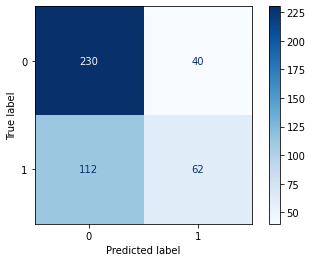

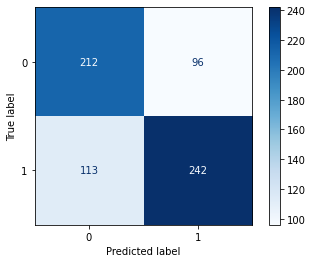

In [ ]:
def remove_race(df):
  # BEGIN YOUR CODE HERE (~1-2 lines, you can remove the pass statement)
  df = df.drop(columns=["African-American", "Asian", "Caucasian", "Hispanic", "Native American", "Other"])
  return df
  # END YOUR CODE

# BEGIN YOUR CODE HERE (~8 lines if using a scikit-learn model)
# call remove race and pass in X_test and X_train, caucasian test and african american test
print(X_test)
print(remove_race(X_test))
X_train_new = remove_race(X_train)
X_test_new = remove_race(X_test)


model =   LogisticRegression(max_iter=1000)
model.fit(X_train_new, y_train)
print(model.score(X_test_new, y_test))
print(african_american_test.shape)
plot_confusion_matrix(model, remove_race(caucasian_test), y_test[caucasian_test.index], cmap=plt.cm.Blues, values_format='d')
plot_confusion_matrix(model, remove_race(african_american_test), y_test[african_american_test.index], cmap=plt.cm.Blues, values_format='d')
# create the model
# train the model on X_train and y_train
# score the model on X_test and y_test
# plot the confusion matrix for caucasian test and african american test
# END YOUR CODE

## Fairness post-mortem

3.8. Did this change to the dataset help or hurt accuracy? Why?

3.9. Report the false positive and false negative rates for the new model for each group. How does this differ from the previous model you trained?

3.10. Based on the fairness criterion defined above, is this model fair? Why or why not? 

3.11. If you needed to recommend one of these systems to a policymaker, which one would you choose? Defend your choice.

In [ ]:
# Please write your answers in the space provided.
# QUESTION 8 (~2-3 sentences)

# QUESTION 9

# QUESTION 10 (~2-3 sentences)

# QUESTION 11 (~3-6 sentences)


This is deeply disconcerting -- we removed race as a variable, and got results that still don't look that great in terms of fairness. How is this possible? And is there a way we can fix this?

We'll explore more definitions of fairness, considerations when building a model, and more in the next notebooks!

# Further Reading

## Technical 

Angwin, Julia et. al. "Machine Bias," *ProPublica,* May 23, 2016, https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

## Non-technical 

Alexander, Michelle. "The New Jim Crow: Mass Incarceration in the Age of Colorblindness," New York, NY: The New Press, 2010.

Christin, Angèle. “Algorithms in Practice: Comparing Web Journalism and Criminal Justice.” Big Data & Society, December 2017. doi:10.1177/2053951717718855.

O'Neil, Cathy. "Weapons of Math Destruction: How Big Data Increases Inequality and Threatens Democracy," Largo, MD: Crown Publishing Group, 2017.